Time per board: 0.49047917127609253ms


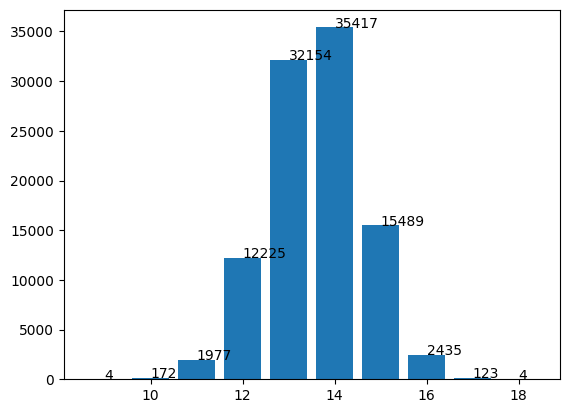

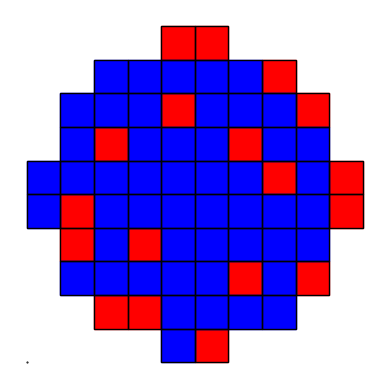

In [1]:
from __future__ import annotations

import collections
import time

from game.convex import grid
from game.mecanics import rules
from game.players import heuristics
from matplotlib import pyplot as plt

gr = grid.Grid([
    # my grid
    # (0, 1),
    # (1, 0),
    # (-1, 1),
    # (-3 , 1),
    # (2, 1),
    # prof mojette grid
    (1, 0),
    (1, 1),
    (2, 1),
    (-1, 1),
    (-2, 1),
    (0, 1),
    (1, 2),
    (-1, 2),

    # (5, 5),
    # square
    # (0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
    # (1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),
])

def play(gri : grid.Grid) -> grid.Grid:

    g = gri.__copy__()

    h = heuristics.Heuristic(g, 4)

    # for x, y in [(4, 0), (5, 0), (4, 9), (5, 9)]:
    #     g.play(x, y)
    #     h.played.add((x, y))

    pre = g.__copy__()
    while not h.is_busted():
        pre = g.__copy__()

        h.play()

    return pre


start = time.time()
best: grid.Grid = grid.Grid([])
nb_played = []

n = 100000
for _ in range(n):

    g = play(gr)

    nb_played.append(len(g.played))

    if best is None or len(best.played) < len(g.played):
        best = g

stop = time.time()

print(f"Time per board: {(stop - start) / n * 1000}ms")  # noqa: T201 - using in ipynb

col = collections.Counter(nb_played)
plt.bar(list(col.keys()), list(col.values()))

for i, v in col.items():
    plt.text(i, v, str(v))

plt.show()

_ = best.to_image()  # using _ =  to prevent displaying the image twice
